### Progress Snapshot
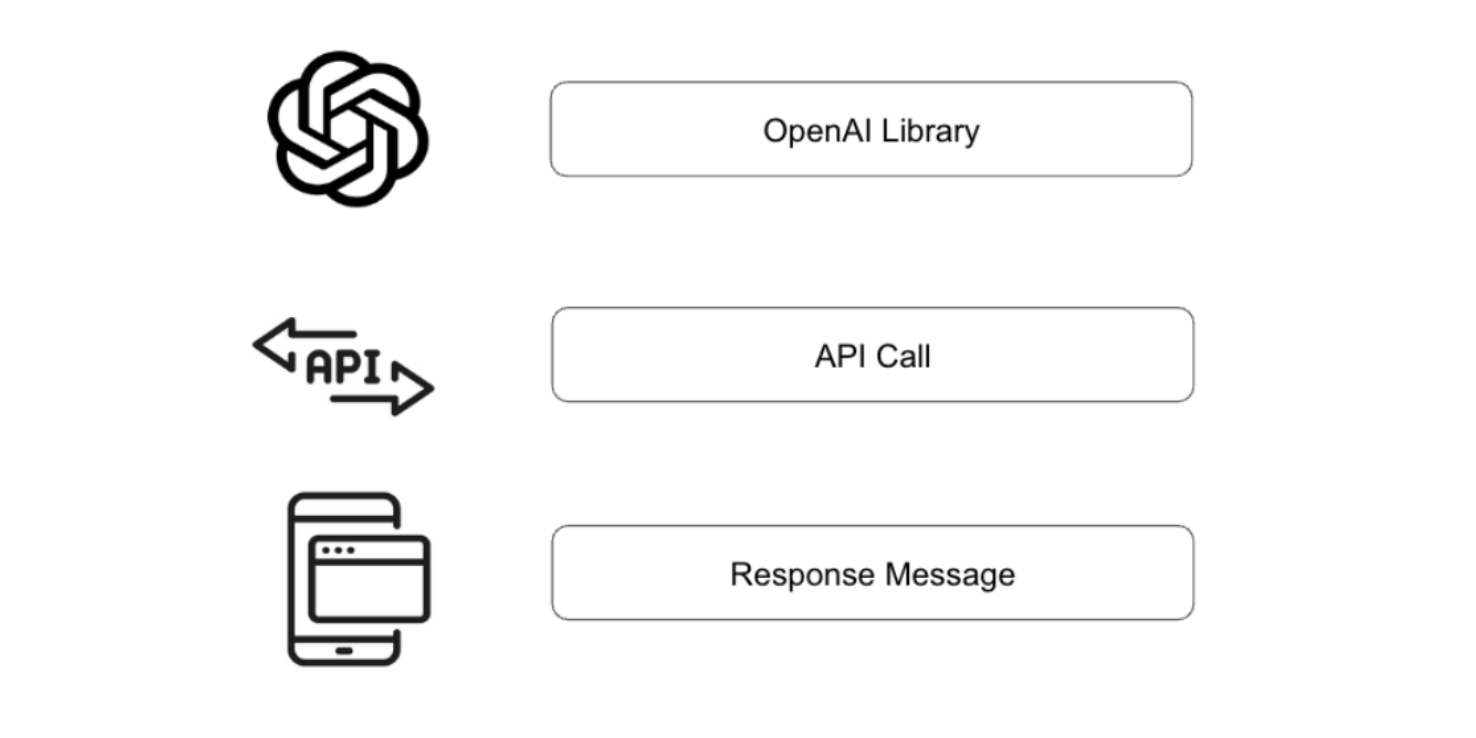

In [ ]:
from openai import OpenAI

client = OpenAI(api_key="ENTER YOUR KEY HERE")
response = client.chat.completions.create( 
    model="gpt-4o-mini", 
    messages=[ 
        {"role": "user", "content": "Who developed ChatGPT?"} 
    ])

print(response.choices[0].message.content)

### Challenges of a production environment
1. Error Handling
- Displaying user-friendly error messages
- Alternatives for when the service is unavailable

2. Moderation and Safety
- Control unwanted inputs
- Minimizing the risk of data leaks

3. Testing and Validation
- Checking for responses that are out oftopic
- Testing for inconsistent behavior

4. Communication with External Systems
- Calling external functions and APIs
- Optimizing response times

### Components of an OpenAI API request

In [ ]:
from openai import OpenAI

client = OpenAI(api_key="ENTER YOUR KEY HERE")
response = client.chat.completions.create(  
    model="gpt-4o-mini",
    messages=[  
        {"role": "user", "content": "Please write down five trees with their scientific names in json format."} 
    ],  response_format={"type": "json_object"}
)

In [ ]:
print(response.choices[0].message.content)

Output:
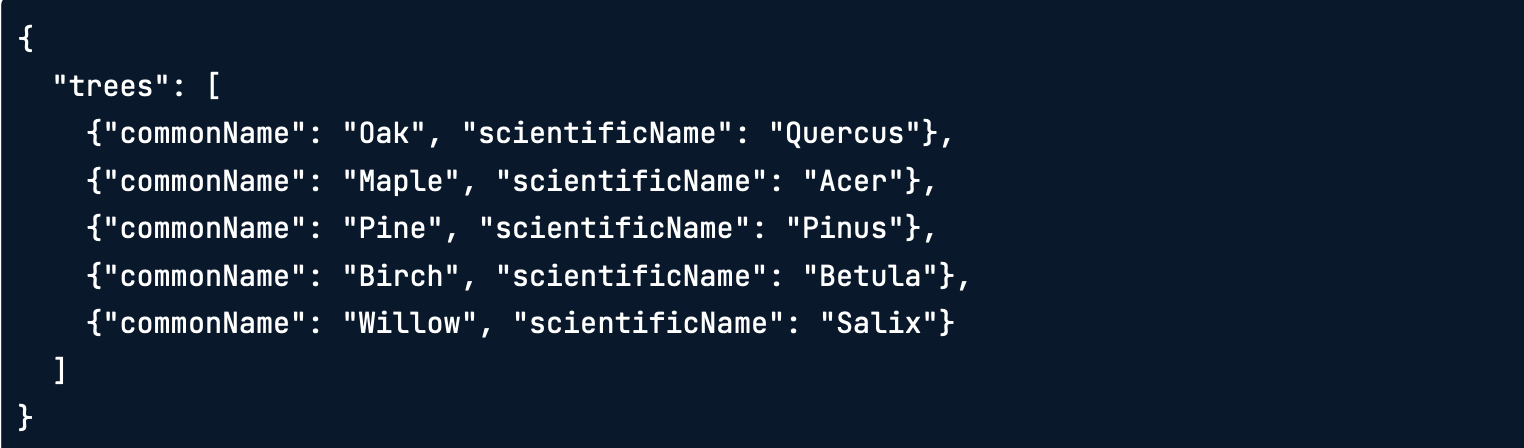

In [ ]:
# Practice 1

# Create the OpenAI client
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create the request
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
   {"role": "user", "content": """I have these notes with book titles and authors: New releases this week! 
   The Beholders by Hester Musson, The Mystery Guest by Nita Prose. Please organize the titles and authors in a json file.""""}
  ],
  # Specify the response format
  response_format={"type": "json_object"}
)

# Print the response
print(response.choices[0].message.content)

### Errors in AI applications
- Simplifying the user experience
- Eliminating barriers

### Errors in the OpenAI API library

In [ ]:
response = client.chat.completions.create(
    model="text-davinci-001", 
    messages=[ {"role": "user", "content": "List two data science professions with related skills in json format."} ], 
    response_format={"type": "json_object"}
)

Output:
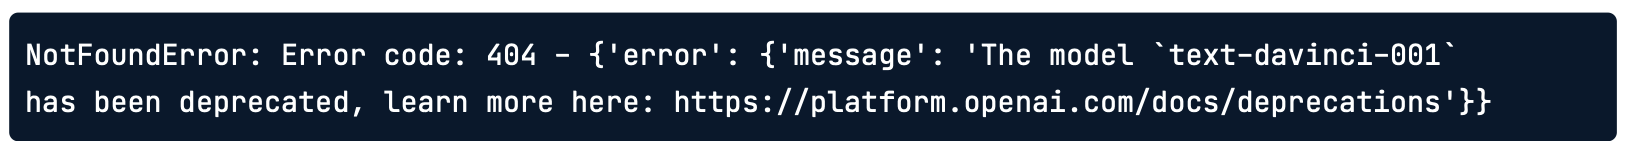

### Connection errors
- Generally due to connection issues on either the user's or the service's side
- Examples: `InternalServerError`, `APIConnectionError`, `APITimeoutError`
- Potential solution:
  - Checking your connection configuration
  - Reaching out to support if that fails

### Resource limits errors
- Generally due limits on the frequency of requests or the amount of text passed
- Examples: `ConflictError`, `RateLimitError`
- Potential solution:
   - Checking limit restrictions
   - Ensure requests are within limits

### Authentication errors

In [ ]:
client = OpenAI(api_key="This is an Invalid Key")
response = client.chat.completions.create( 
    model="gpt-4o-mini", 
    messages=[   {"role": "user",
                  "content": "List two data science professions with related skills in json format."}
             ], 
    response_format={"type": "json_object"}
)

Output:
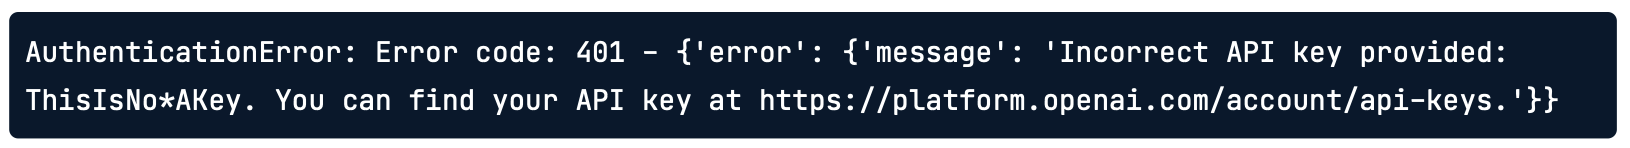

### Bad request errors

In [ ]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[  
        {"role": "This is not a Valid Role", 
         "content": "List two data science professions with related skills in json format."} ],
    response_format={"type": "json_object"}
)

Output:
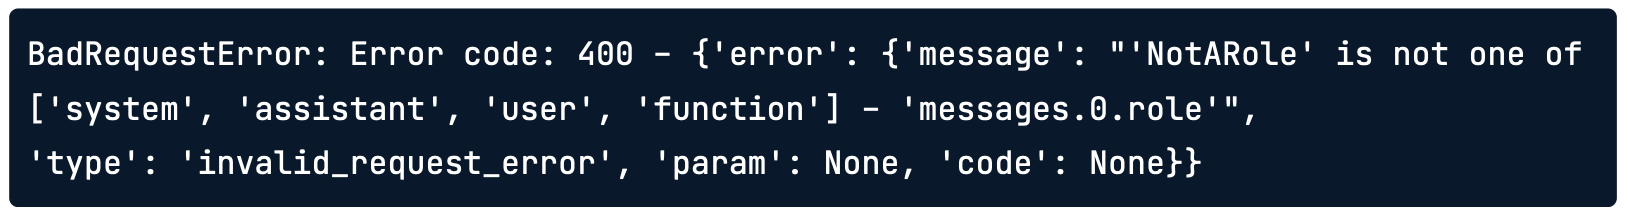

### Handling exceptions

In [ ]:
try:   
    response = client.chat.completions.create(   
        model="gpt-4o-mini",   
        messages=[{"role": "user", "content": "List five data science professions."}]
    )

except openai.AuthenticationError as e:
    print(f"OpenAI API failed to authenticate: {e}")
    pass

except openai.RateLimitError as e:
    print(f"OpenAI API request exceeded rate limit: {e}")
    pass

except Exception as e:
    print(f"Unable to generate a response. Exception: {e}")
    pass

In [ ]:
# Practice 2

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Use the try statement
try:
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            message
        ]
    )
    # Print the response
    print(response.choices[0].message.content)

# Use the except statement
except openai.AuthenticationError as e:
    print(f"OpenAI API failed to authenticate: {e}")
    pass

except Exception as e:
    print("Please double check your authentication key and try again.")
    print("Error details:", e)

## Batching

### What are rate limits
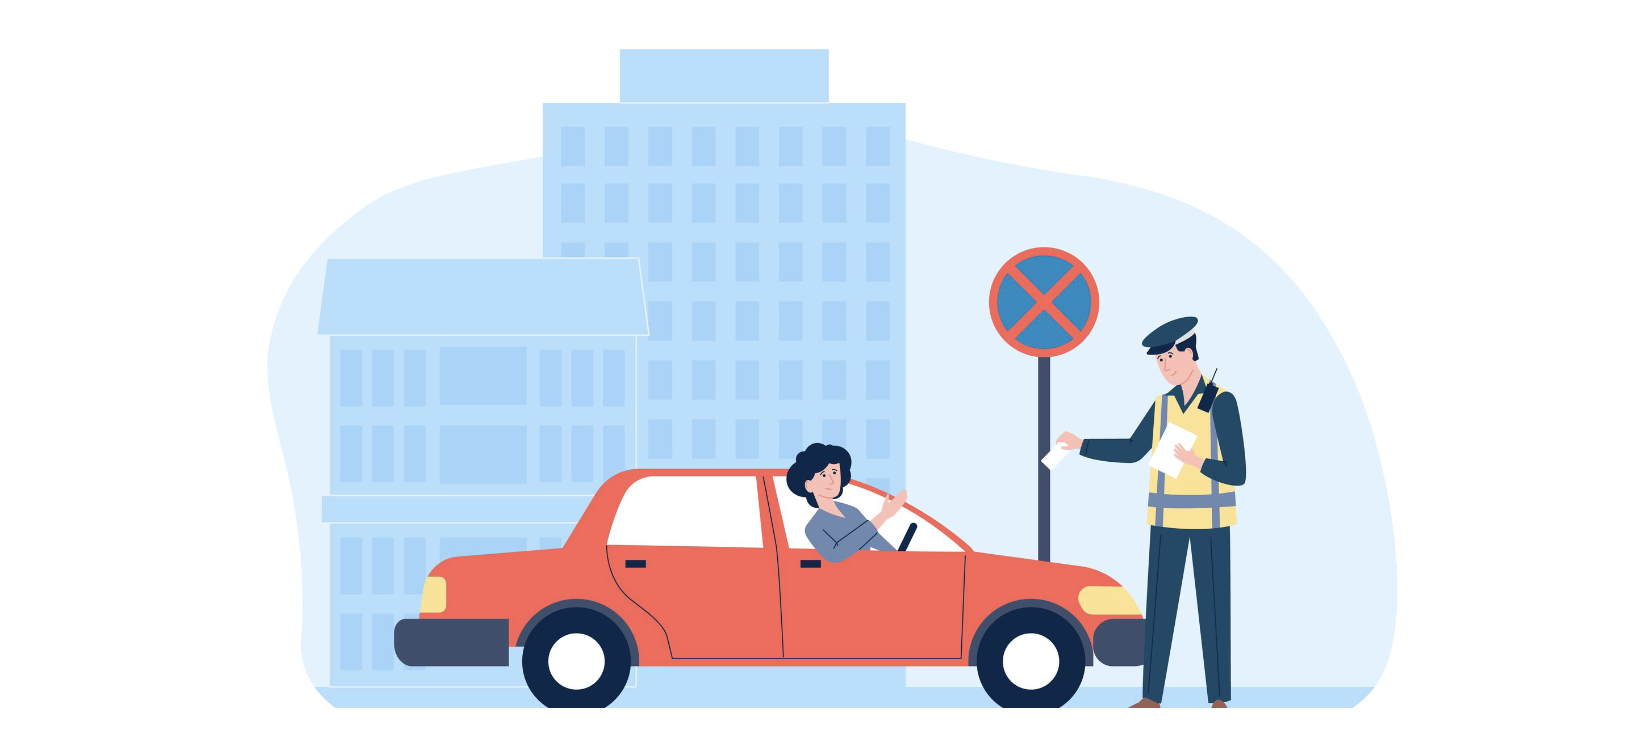

### How rate limits occur
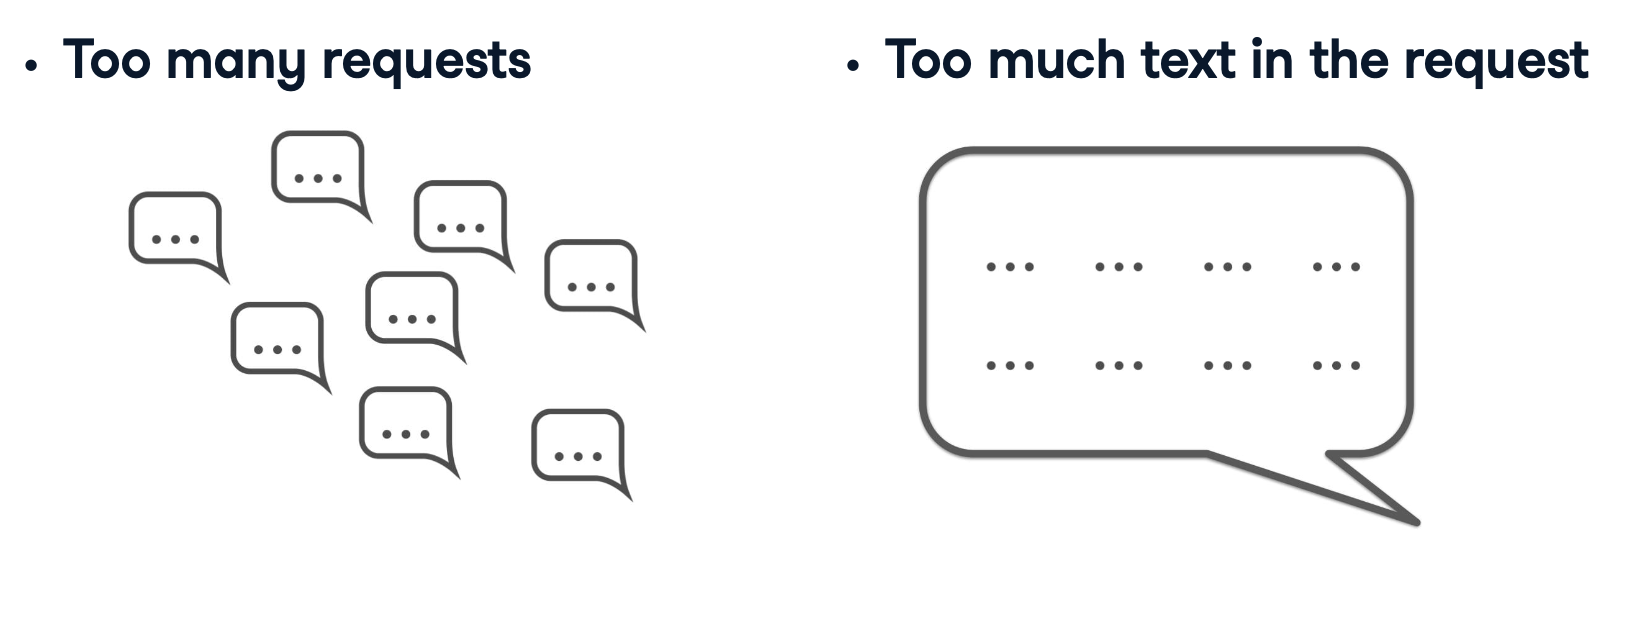

### Avoiding rate limits
- Retry
  - Short wait between requests<br><br>

- Batching
  - Processing multiple messages in one request<br><br>

- Reducing tokens
  - Quantifying and cutting down the number of tokens

### Retrying

In [ ]:
from tenacity import ( 
    retry,   
    stop_after_attempt,  
    wait_random_exponential
)

@retry(wait=wait_random_exponential(min=1, max=60), stop=stop_after_attempt(6))

In [ ]:
@retry(wait=wait_random_exponential(min=1, max=60), stop=stop_after_attempt(6))

def get_response(model, message):  
    response = client.chat.completions.create(   
        model=model,     
        messages=[message],   
        response_format={"type": "json_object"}    
    )
    return response.choices[0].message.content

### Batching

In [ ]:
countries = ["United States", "Ireland", "India"]
message=[   
    {"role": "system",
     "content": """You are given a series of countries and are asked to return the   
     country and capital city. Provide each of the questions with an answer in the  
     response as separate content.""",  
    }]

[message.append({"role": "user", "content": i }) for i in countries]

In [ ]:
response = client.chat.completions.create(   
    model="gpt-4o-mini",    
    messages=message  
)

print(response.choices[0].message.content)

### Reducing tokens

In [ ]:
import tiktoken

encoding = tiktoken.encoding_for_model("gpt-4o-mini")
prompt = "Tokens can be full words, or groups of characters commonly grouped together: tokenization."

num_tokens = len(encoding.encode(prompt))
print("Number of tokens in prompt:", num_tokens)

In [ ]:
# Practice 3

# Import the tenacity library
from tenacity import ( 
    retry,   
    stop_after_attempt,  
    wait_random_exponential
)

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Add the appropriate parameters to the decorator
@retry(wait=wait_random_exponential(min=5, max=40), stop=stop_after_attempt(4))
def get_response(model, message):
    response = client.chat.completions.create(
      model=model,
      messages=[message]
    )
    return response.choices[0].message.content
print(get_response("gpt-4o-mini", {"role": "user", "content": "List ten holiday destinations."}))

In [ ]:
# Practice 4

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

messages = []

# Provide a system message and user messages to send the batch
messages.append({"role": "system", "content": """Convert each measurement from kilometers to miles and present the results in a 
table with two columns: 'Kilometers' and 'Miles'."""})

# Append measurements to the message
[messages.append({"role": "user", "content": str(i)}) for i in measurements]

response = get_response(messages)
print(response)

In [ ]:
# Practice 5

client = OpenAI(api_key="<OPENAI_API_TOKEN>")
input_message = {"role": "user", "content": "I'd like to buy a shirt and a jacket. Can you suggest two color pairings for these items?"}

# Use tiktoken to create the encoding for your model
encoding = tiktoken.encoding_for_model("gpt-4o-mini")
# Check for the number of tokens
num_tokens = len(encoding.encode(input_message["content"]))

# Run the chat completions function and print the response
if num_tokens <= 100:
    response = client.chat.completions.create(model="gpt-4o-mini", messages=[input_message])
    print(response.choices[0].message.content)
else:
    print("Message exceeds token limit")